In [ ]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b325c163d730562bb6deb1ace5acbed0306f5fbefb90e/flatbuffers-24.3.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571e

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 460.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 4.0 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 7.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.5

In [ ]:
pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/e9/db/f1641a99e1f95489baec8472d2c88c8f6b87f7be242a846864bd1a19c0f4/optuna-3.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/2b/8d/9f11d0b9ac521febb806e7f30dc5982d0f4f5821217712c59005fbc5c1e3/Mako-1.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
from optuna.trial import TrialState
from sklearn.metrics import accuracy_score
import math

In [ ]:
# read in the csv
df = pd.read_csv('GOOG.csv')

In [ ]:
# converting the 'Date' column to datetime format and setting it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# splitting the closing price data into test and train
split_ratio = 0.9
split_index = int(len(df) * split_ratio)
df_train = df[:split_index]
df_test = df[split_index:]

train = df_train["Close"].values
test = df_test["Close"].values

In [ ]:
# scaling the test and train data based off the train data
sc = MinMaxScaler(feature_range=(0, 1))
train = np.reshape(train, (-1,1))
test = np.reshape(test, (-1,1))

sc.fit(train)
train = sc.transform(train)
test = sc.transform(test)


In [ ]:
# transform our data into X, y pairs, using 60 consecutive days of closing values, to predict the closing value of the next day
def prepare_data(t):
    X = []
    y = []

    time_step = 60

    for i in range(time_step, t.shape[0]):
        X.append(t[i-time_step:i,0])
        y.append(t[i,0])

    X, y = np.array(X), np.array(y)

    X = X.reshape(X.shape[0],X.shape[1],1)
    y = y.reshape(y.shape[0],1)
    return (X, y)

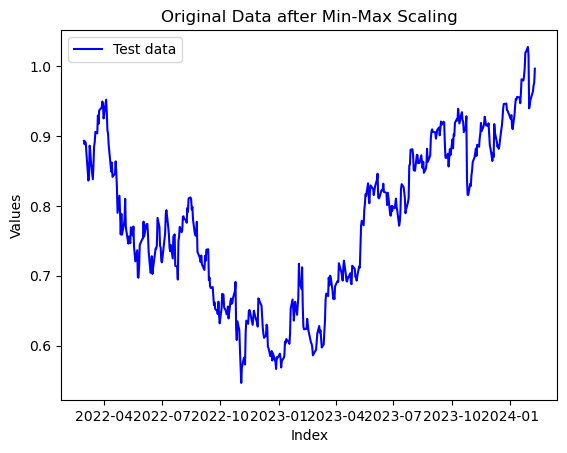

In [ ]:
# plot of what our test data looks like
plt.plot(df_test.index, test, color='blue', label='Test data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Original Data after Min-Max Scaling')
plt.legend()
plt.show()

In [ ]:
# getting X train and y train values
X_train, y_train = prepare_data(train)

In [ ]:
# building a Sequential neural network model with two layers of SimpleRNN cells, followed by dropout layers, and a single output dense layer,
# compiled with the RMSprop optimizer and mean squared error loss
model = Sequential()
model.add(SimpleRNN(units=128, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer="RMSprop", loss="mse")

model.summary()

/Users/chrisytz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_82 (SimpleRNN)       │ (None, 60, 128)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_83 (SimpleRNN)       │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fitting our model on the training data
history = model.fit(X_train, y_train, epochs = 35, batch_size = 40)

Epoch 1/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3501
Epoch 2/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0084
Epoch 3/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0026
Epoch 4/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0014
Epoch 5/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0011
Epoch 6/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0010
Epoch 7/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.0192e-04
Epoch 8/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 9.1525e-04
Epoch 9/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.1808e-04
Epoch 10/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.2506e-04
Epoch 11/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.4829e-04
Epoch 12/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.6593e-04
Epoch 13/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 5.7512e-04
Epoch 14/35
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.8441e-04
Epoch 15/35

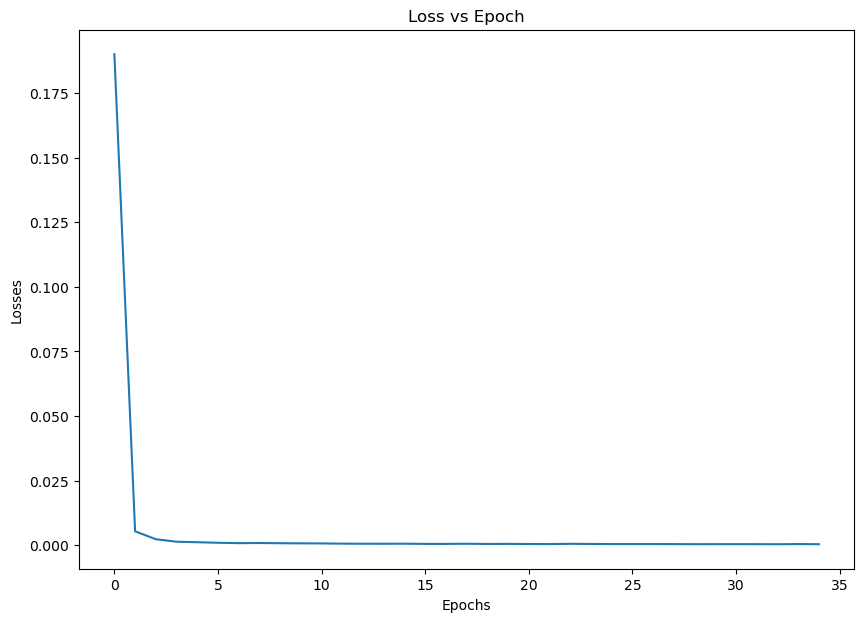

In [ ]:
# plotting loss vs epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Loss vs Epoch")
plt.show()

In [ ]:
# predicting the train data
y_predicted = model.predict(X_train)  # predictions
y_predicted = sc.inverse_transform(y_predicted) # scaling back from 0-1 to original

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
# reverse the scaling
y_train = sc.inverse_transform(y_train) # scaling back from 0-1 to original

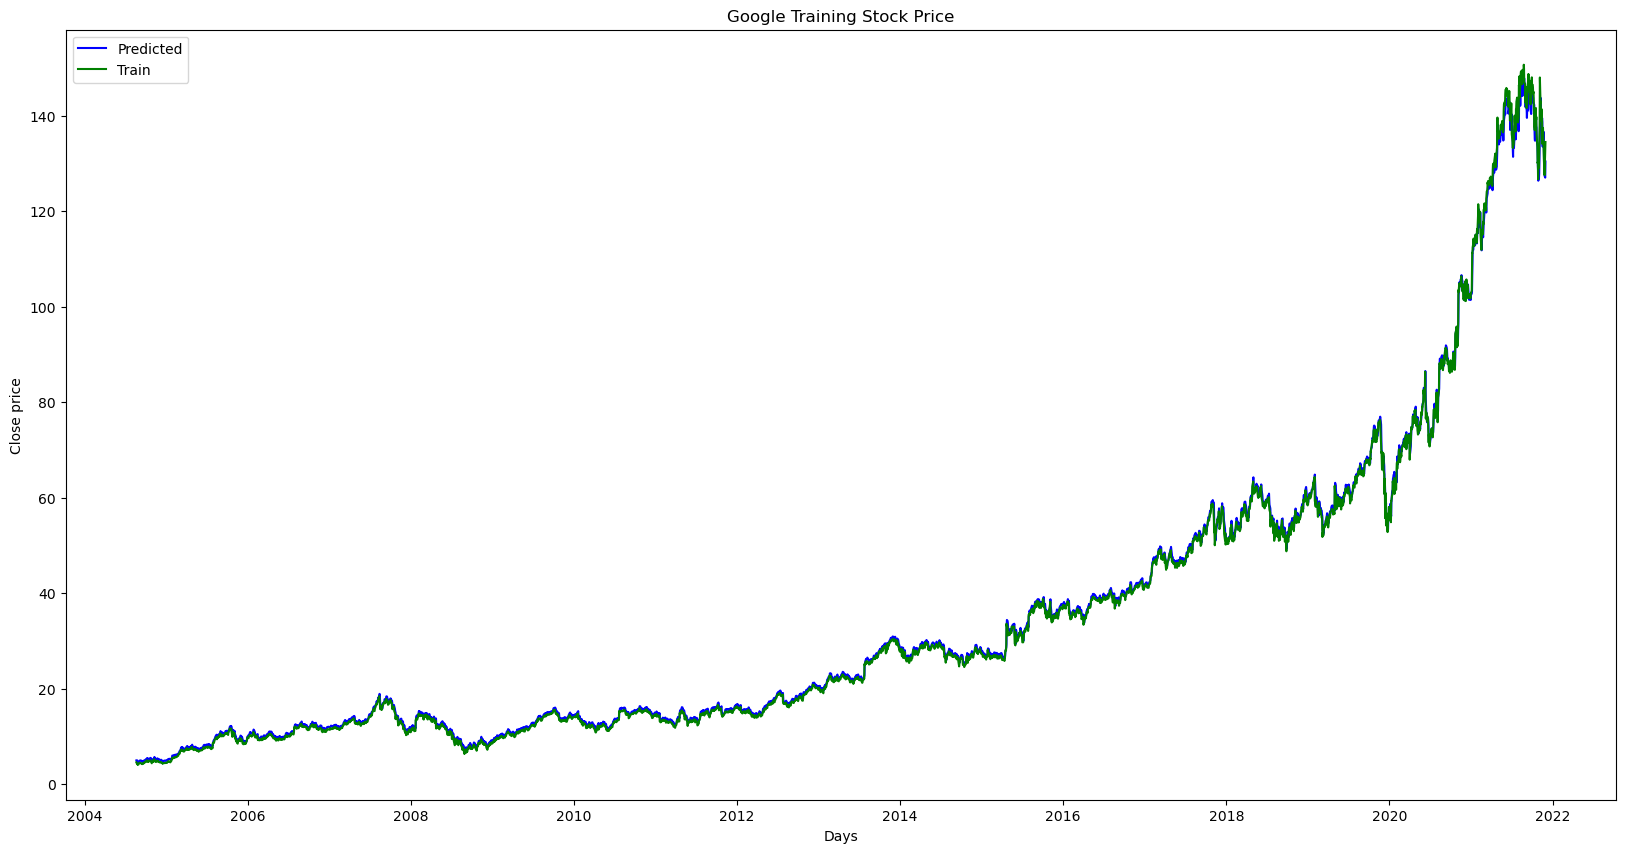

In [ ]:
# plotting the predicted results
plt.figure(figsize = (20,10))
plt.plot(df_train.index[:len(y_predicted)], y_predicted, color = "b", label = "Predicted" )
plt.plot(df_train.index[:len(y_train)], y_train, color = "g", label = "Train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Google Training Stock Price")
plt.legend()
plt.show()

In [ ]:
# getting X test and y test values
X_test, y_test = prepare_data(test)

In [ ]:
# predicting our test data, and transforming it back by reversing the scaling
y_test_predicted = model.predict(X_test)
y_test_predicted = sc.inverse_transform(y_test_predicted)
y_test = sc.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


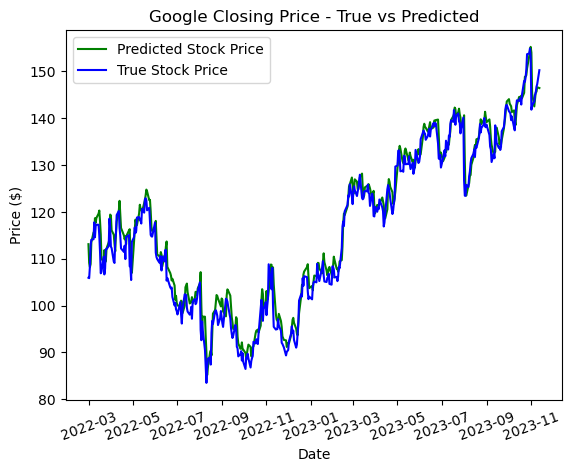

In [ ]:
# plotting the test results
plt.figure()
plt.plot(df_test.index[:len(y_test_predicted)], y_test_predicted, label = "Predicted Stock Price", color= "green")
plt.plot(df_test.index[:len(y_test)], y_test, label = "True Stock Price", color="blue")
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.title("Google Closing Price - True vs Predicted")
plt.xticks(rotation=20)
plt.legend()
plt.show()

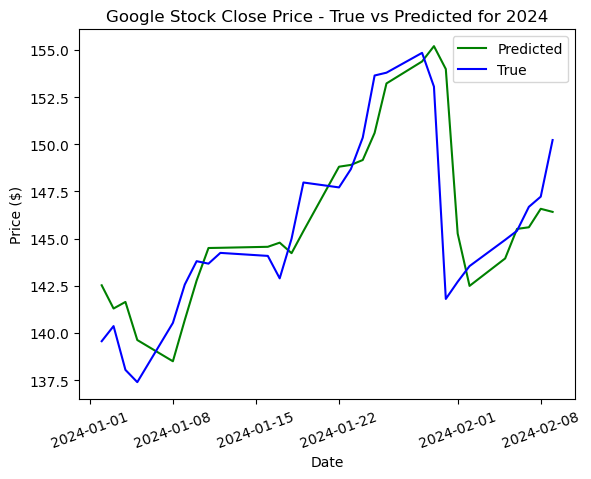

In [ ]:
# plotting test results for 2024
plt.title('Google Stock Close Price - True vs Predicted for 2024')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.plot(df_test.index[-28:], y_test_predicted[-28:], 'green', label='Predicted')
plt.plot(df_test.index[-28:], y_test[-28:], 'blue', label='True')
plt.xticks(rotation=20)
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_test_predicted)

In [ ]:
mae = mean_absolute_error(y_test, y_test_predicted)

In [ ]:
rmse = math.sqrt(mse)

In [ ]:
print(mse, mae, rmse)

8.96520258397055 2.271911193254015 2.9941948139642736
